In [29]:
#Going to import our dataset first
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split



In [30]:
my_file = "drive/MyDrive/Datasets/emails.csv"
my_csv = pd.read_csv(my_file)
my_csv = my_csv.drop(my_csv.columns[0], axis=1)

X = my_csv.drop(columns=["Prediction"])
y = my_csv["Prediction"]

#Splitting the data into training and testing

test_var = 0.2 #will start with this now
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_var, random_state=42)


In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

def naive_algorithm(X_train, X_test, y_train, y_test, test_var, btest_report, alpha_val=1):
  naive_bayes = MultinomialNB(alpha=alpha_val)
  naive_bayes.fit(X_train, y_train)

  naive_predictions = naive_bayes.predict(X_test)
  naive_accuracy = accuracy_score(y_test, naive_predictions)
  naive_report = classification_report(y_test, naive_predictions)

  print(naive_accuracy, test_var)

  if btest_report:
    print(naive_report)
    conf_matrix_naive = confusion_matrix(y_test, naive_predictions)
    sns.heatmap(conf_matrix_naive, annot=True, fmt="d", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Naive Bayes Confusion Matrix")
    plt.show()

btest_report = False
test_var_arr = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8] #want to also test out how different amount of test data size affects accuracy
for test_var in test_var_arr:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_var, random_state=42)
  naive_algorithm(X_train, X_test, y_train, y_test, test_var, btest_report)

n_alpha = [0.01, 0.1, 1, 10, 100]
nb_results = np.zeros_like(n_alpha, dtype=float) #so we can plot the different accuracies across different alphas
test_var = 0.2 #This split gave us the best result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #back to the 20% split
i = 0

for n in n_alpha:  #trying different alpha hyper paramter for naive bayes multinomial model
  naive_bayes = MultinomialNB(alpha=n)
  naive_bayes.fit(X_train, y_train)

  naive_predictions = naive_bayes.predict(X_test)
  naive_accuracy = accuracy_score(y_test, naive_predictions)
  nb_results[i] = naive_accuracy
  i = i + 1




0.9536679536679536 0.1
0.9545893719806763 0.2
0.9484536082474226 0.3
0.9463508941517641 0.4
0.9416086620262955 0.5
0.9452319587628866 0.6
0.9386909693454847 0.7
0.9342677622039632 0.8


Then we can Plot different accuracies for Naive Bayes algorithm with different alpha values set.

[0.95942029 0.95748792 0.95458937 0.94879227 0.88405797]


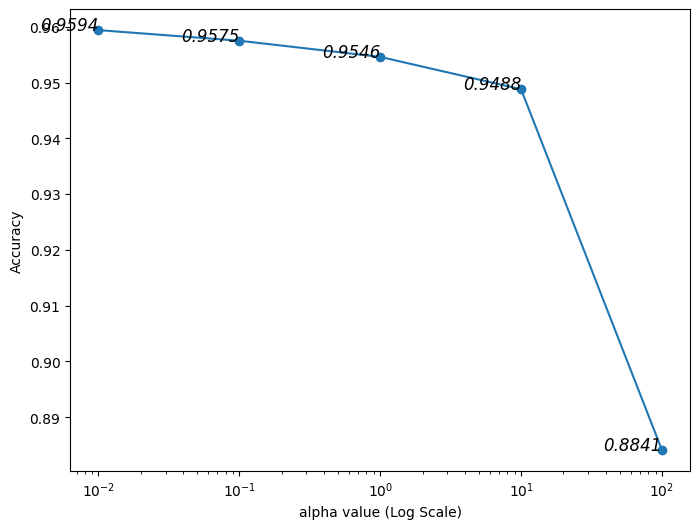

In [32]:
print(nb_results)
nb_results = np.around(nb_results, decimals = 4)
plt.figure(figsize=(8, 6))

plt.plot(n_alpha, nb_results)
plt.scatter(n_alpha, nb_results)
# Add value labels next to each point
for g, accuracy in zip(n_alpha, nb_results):
    plt.text(g, accuracy, accuracy, ha='right', fontstyle='oblique', fontsize='large')
plt.xlabel('alpha value (Log Scale)')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()


0.9594202898550724 0.2
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       739
           1       0.90      0.96      0.93       296

    accuracy                           0.96      1035
   macro avg       0.94      0.96      0.95      1035
weighted avg       0.96      0.96      0.96      1035



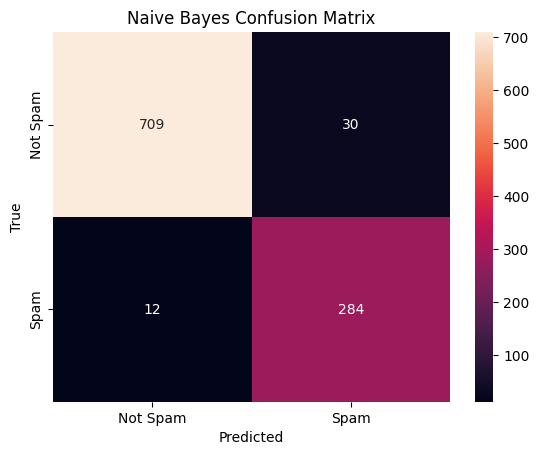

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
btest_report = True
naive_algorithm(X_train, X_test, y_train, y_test, test_var, btest_report, 0.01)

0.8415458937198068 1
0.9420289855072463 10
0.9768115942028985 100
0.978743961352657 1000
0.9806763285024155 3000
0.9777777777777777 5000
0.9806763285024155 3000
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       739
           1       0.96      0.97      0.97       296

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



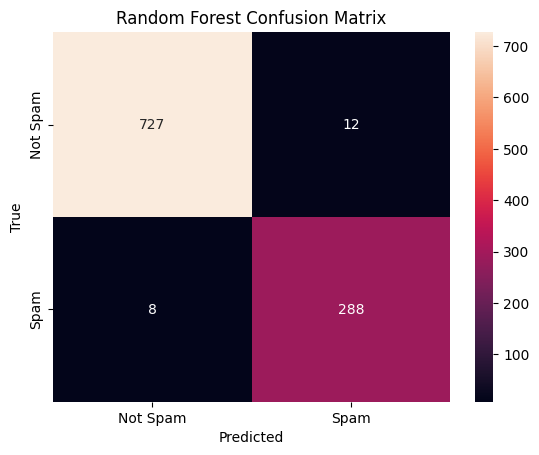

0.9806763285024155

In [34]:
from sklearn.ensemble import RandomForestClassifier

def forest_algorithm(X_train, X_test, y_train, y_test, test_var, btest_report):
  random_forest = RandomForestClassifier(n_estimators=test_var, random_state=79)
  random_forest.fit(X_train, y_train)
  forest_prediction = random_forest.predict(X_test)
  forest_accuracy = accuracy_score(y_test, forest_prediction)

  forest_report = classification_report(y_test, forest_prediction)

  print(forest_accuracy, test_var)

  if btest_report:
    print(forest_report)
    conf_matrix_forest = confusion_matrix(y_test, forest_prediction)
    sns.heatmap(conf_matrix_forest, annot=True, fmt="d", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Random Forest Confusion Matrix")
    plt.show()

  return forest_accuracy

btest_report = False
num_estimators = [1, 10, 100, 1000, 3000, 5000]
rf_results = np.zeros_like(num_estimators, dtype=float) #so we can plot the different accuracies across different alphas

i = 0
for num in num_estimators:
  rf_results[i] = forest_algorithm(X_train, X_test, y_train, y_test, num, btest_report)
  i = i + 1

#3000 num_estimator yields the best results, lets use that
num = 3000
btest_report = True
forest_algorithm(X_train, X_test, y_train, y_test, num, btest_report)

[0.84154589 0.94202899 0.97681159 0.97874396 0.98067633 0.97777778]


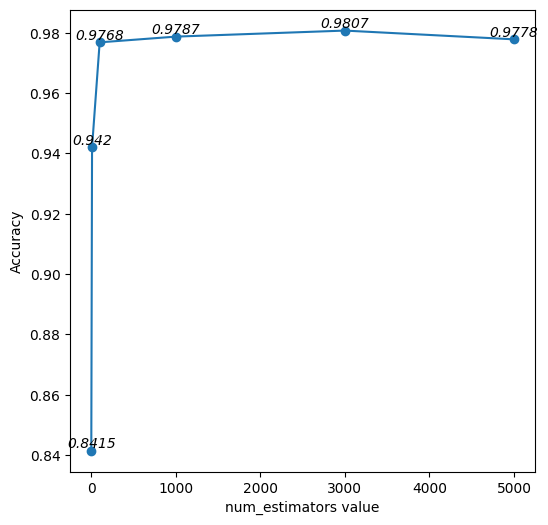

In [35]:
print(rf_results) #now we plot the random forest against different hyper params
rf_results = np.around(rf_results, decimals = 4)
plt.figure(figsize=(6, 6))

plt.plot(num_estimators, rf_results)
plt.scatter(num_estimators, rf_results)
# Add value labels next to each point
for g, accuracy in zip(num_estimators, rf_results):
    plt.text(g, accuracy, accuracy, ha='center', va='bottom', fontstyle='oblique', fontsize=10)
plt.xlabel('num_estimators value')
plt.ylabel('Accuracy')
plt.show()


In [36]:
from sklearn.linear_model import LogisticRegression

def logistic_algorithm(X_train, X_test, y_train, y_test, test_var, btest_report):
  logistic = LogisticRegression(max_iter=1000, C=test_var, random_state=79)
  logistic.fit(X_train, y_train)
  logistic_prediction = logistic.predict(X_test)
  logistic_accuracy = accuracy_score(y_test, logistic_prediction)

  logistic_report = classification_report(y_test, logistic_prediction)

  print(logistic_accuracy, test_var)

  if btest_report:
    print(logistic_report)
    conf_matrix_logistic = confusion_matrix(y_test, logistic_prediction)
    sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Logistic Regression Confusion Matrix")
    plt.show()

  return logistic_accuracy

Cs = [0.001, 0.01, 0.1, 1]
lr_results = np.zeros_like(Cs, dtype=float)

i = 0
btest_report = False
for C in Cs:
  lr_results[i] = logistic_algorithm(X_train, X_test, y_train, y_test, C, btest_report)
  i = i + 1


0.9391304347826087 0.001
0.9710144927536232 0.01
0.9748792270531401 0.1
0.9719806763285024 1


[0.93913043 0.97101449 0.97487923 0.97198068]


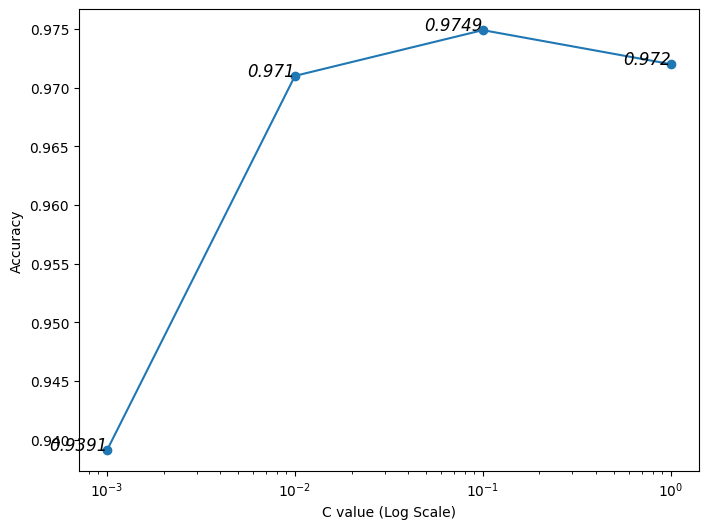

0.9748792270531401 0.1
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       739
           1       0.95      0.96      0.96       296

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.97      0.97      1035



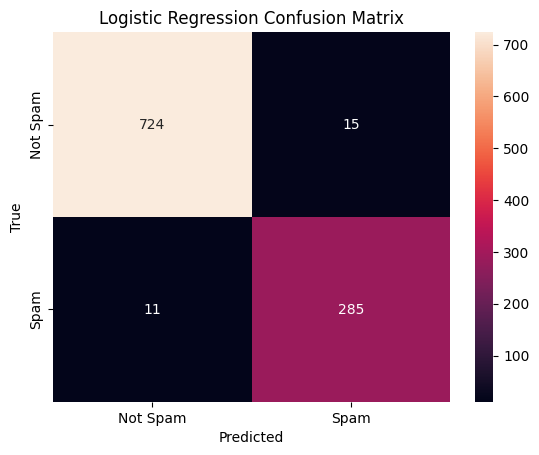

0.9748792270531401

In [37]:

print(lr_results)
lr_results = np.around(lr_results, decimals = 4)
plt.figure(figsize=(8, 6))

plt.plot(Cs, lr_results)
plt.scatter(Cs, lr_results)
# Add value labels next to each point
for g, accuracy in zip(Cs, lr_results):
    plt.text(g, accuracy, accuracy, ha='right', fontstyle='oblique', fontsize='large')
plt.xlabel('C value (Log Scale)')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()

btest_report = True
num = 0.1 #This yielded highest accuracy
logistic_algorithm(X_train, X_test, y_train, y_test, num, btest_report)

In [38]:
#Now we will finally do KNN
from sklearn.neighbors import KNeighborsClassifier

def knn_algorithm(X_train, X_test, y_train, y_test, test_var, btest_report):
  knn = KNeighborsClassifier(n_neighbors=test_var)
  knn.fit(X_train, y_train)
  knn_prediction = knn.predict(X_test)
  knn_accuracy = accuracy_score(y_test, knn_prediction)

  knn_report = classification_report(y_test, knn_prediction)

  print(knn_accuracy, test_var)

  if btest_report:
    print(knn_report)
    conf_matrix_knn = confusion_matrix(y_test, knn_prediction)
    sns.heatmap(conf_matrix_knn, annot=True, fmt="d", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("KNN Confusion Matrix")
    plt.show()

  return knn_accuracy

k_vals = [1, 5, 10, 50, 100]
knn_results = np.zeros_like(k_vals, dtype=float)

i = 0;
btest_report = False
for k in k_vals:
  knn_results[i] = knn_algorithm(X_train, X_test, y_train, y_test, k, btest_report)
  i = i + 1




0.8608695652173913 1
0.8628019323671497 5
0.885024154589372 10
0.8579710144927536 50
0.821256038647343 100


[0.86086957 0.86280193 0.88502415 0.85797101 0.82125604]


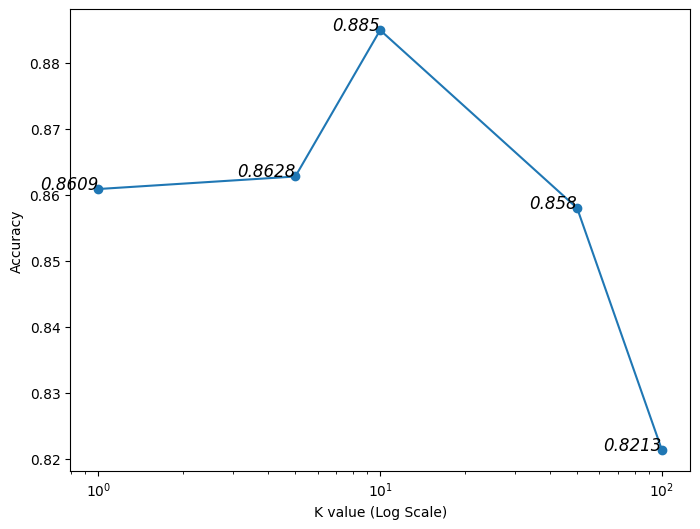

0.885024154589372 10
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       739
           1       0.78      0.82      0.80       296

    accuracy                           0.89      1035
   macro avg       0.86      0.87      0.86      1035
weighted avg       0.89      0.89      0.89      1035



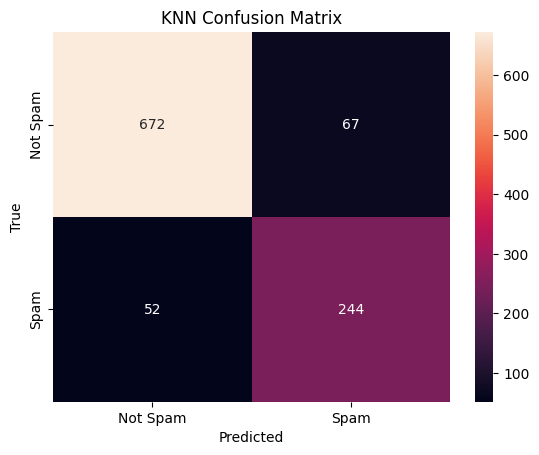

0.885024154589372

In [39]:
print(knn_results)
knn_results = np.around(knn_results, decimals = 4)
plt.figure(figsize=(8, 6))

plt.plot(k_vals, knn_results)
plt.scatter(k_vals, knn_results)
# Add value labels next to each point
for g, accuracy in zip(k_vals, knn_results):
    plt.text(g, accuracy, accuracy, ha='right', fontstyle='oblique', fontsize='large')
plt.xlabel('K value (Log Scale)')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()

btest_report = True
num = 10 #This yielded highest accuracy
knn_algorithm(X_train, X_test, y_train, y_test, num, btest_report)

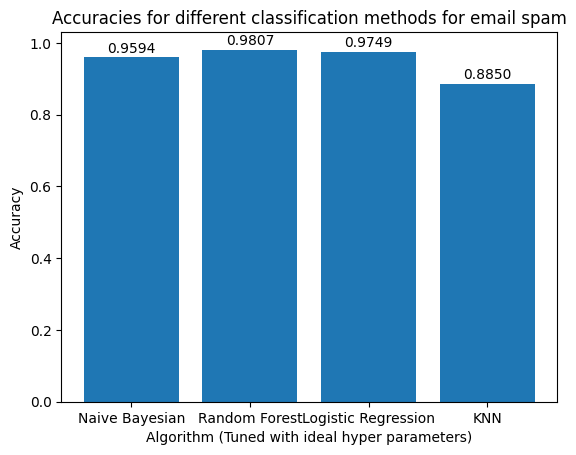

In [40]:
accuracies = [0.9594, 0.9807, 0.9749, 0.8850]
x_axis = ["Naive Bayesian", "Random Forest", "Logistic Regression", "KNN"]

plt.bar(x_axis, accuracies)
plt.xlabel("Algorithm (Tuned with ideal hyper parameters)")
plt.ylabel("Accuracy")

for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.005, f'{accuracy:.4f}', ha='center', va='bottom')

plt.title("Accuracies for different classification methods for email spam")
plt.show()